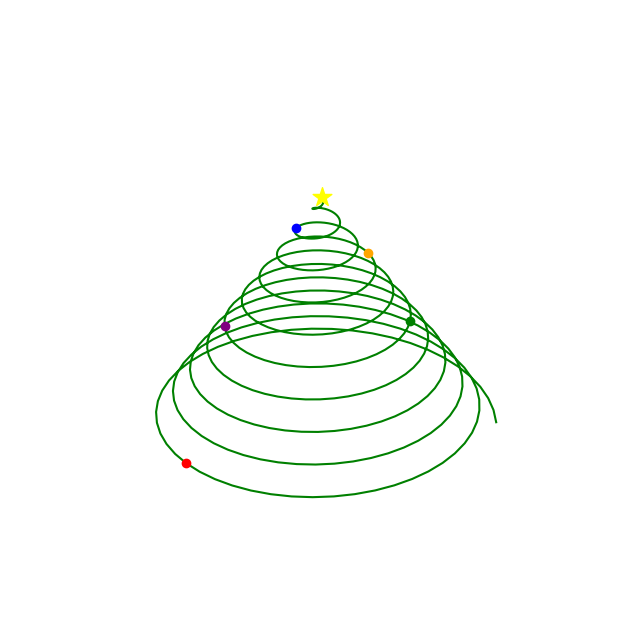

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import HTML

# 나선형 트리의 좌표를 생성합니다.
turns = 10  # 회전 수를 줄입니다.
theta = np.linspace(0, 2 * np.pi * turns, 500)  # 나선형 각도를 줄입니다.
z = np.linspace(0, 2, 500)  # 높이를 정상 방향으로 설정합니다.
r = 0.5 * z  # 반지름을 크게 만듭니다.
x = r * np.sin(theta)
y = r * np.cos(theta)

# 나선형 트리를 뒤집습니다.
z = 2 - z  # 높이를 뒤집어서 아래에서 위로 트리 모양을 만듭니다.

# 나무의 맨 꼭대기 좌표 계산
top_index = np.argmax(z)
top_x = x[top_index]
top_y = y[top_index]
top_z = z[top_index]

# 애니메이션을 설정합니다.
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, 'g-')  # 나선형 트리를 초록색으로 표시

# 맨 꼭대기에 고정된 별 표시
ax.scatter([top_x], [top_y], [top_z], s=200, c='yellow', marker='*')

# 산타들의 초기 위치를 랜덤하게 설정합니다.
num_santas = 5  # 산타의 수
santa_colors = ['red', 'blue', 'purple', 'orange', 'green']  # 추가 산타 색상
santas = []
initial_indices = np.random.randint(0, len(x), num_santas)  # 초기 위치 랜덤 설정
for i in range(num_santas):
    santa = ax.plot([x[initial_indices[i]]], [y[initial_indices[i]]], [z[initial_indices[i]]], 'o', color=santa_colors[i])[0]
    santas.append(santa)

def update(num, x, y, z, santas):
    # 각 산타의 위치 업데이트
    for i, santa in enumerate(santas):
        current_index = (initial_indices[i] + num * (i + 1) * 10) % len(x)  # 산타별로 다른 속도로 움직이게 설정
        santa.set_data([x[current_index]], [y[current_index]])
        santa.set_3d_properties([z[current_index]])
    # 카메라 뷰포인트 회전
    ax.view_init(elev=30, azim=num * 360 / len(x))
    return santas

# 애니메이션을 생성합니다.
ani = animation.FuncAnimation(fig, update, frames=len(x) // 10, fargs=(x, y, z, santas),
                              interval=50, blit=False)

# 축 설정 제거
ax.axis('off')

# 애니메이션 객체를 HTML로 변환하여 표시합니다.
html_animation = HTML(ani.to_jshtml())
html_animation
